# Job Trends in Data Science
By Sean Rubin, Anna Lewis, Malek Kheirddin, Karesse Lockard, and Joseph Pequeno

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import os

#Import csv file containing source data
job_data_path = Path("Resources/jobs_in_data_2024.csv")

#Set up DataFrame
job_data = pd.read_csv(job_data_path)

jobs_df = pd.DataFrame(job_data)
jobs_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


# Exploring the Most Popular Jobs

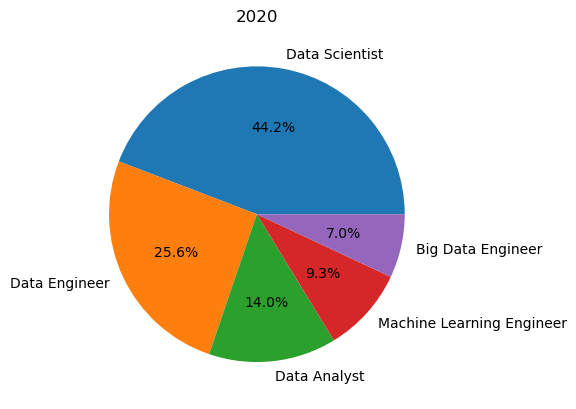

In [5]:
# Generate a pie plot showing the jobs in 2020
jobs_2020 = jobs_df.loc[jobs_df['work_year'] == 2020]
top_5_jobs = jobs_2020['job_title'].value_counts().head(5)
#jobs_2020["job_title"].value_counts().plot(kind = "pie", autopct='%1.1f%%',  title = "2020", ylabel = '')
jobs_2020["job_title"].value_counts().head(5).plot(kind = "pie", autopct='%1.1f%%', title = "2020", ylabel = '')
#plt.savefig("output_data/PieFig1.png")
plt.show()

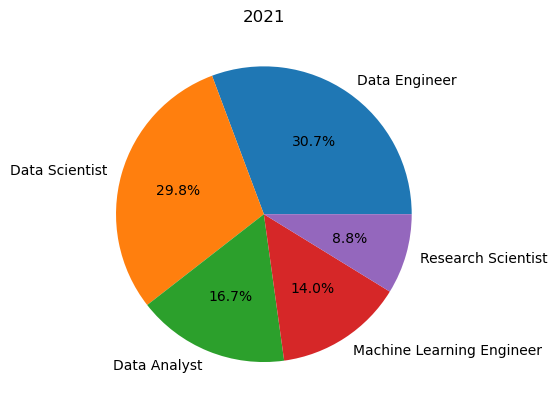

In [6]:
# Generate a pie plot showing the jobs in 2021
jobs_2021 = jobs_df.loc[jobs_df['work_year'] == 2021]
#jobs_2021["job_title"].value_counts().plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2021")
jobs_2021["job_title"].value_counts().head(5).plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2021")
#plt.savefig("output_data/PieFig2.png")
plt.show()

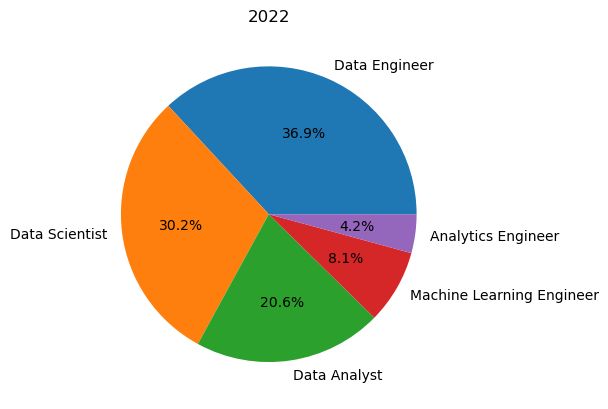

In [7]:

# Generate a pie plot showing the jobs in 2022
jobs_2022 = jobs_df.loc[jobs_df['work_year'] == 2022]
#jobs_2022["job_title"].value_counts().plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2022")
jobs_2022["job_title"].value_counts().head(5).plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2022")
#plt.savefig("output_data/PieFig3.png")
plt.show()

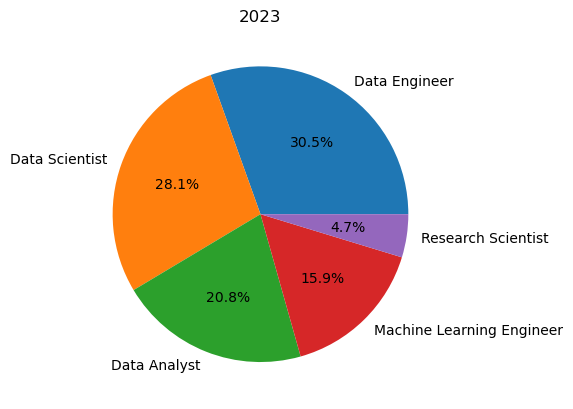

In [8]:
# Generate a pie plot showing the jobs in 2023
jobs_2023 = jobs_df.loc[jobs_df['work_year'] == 2023]
#jobs_2023["job_title"].value_counts().plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2023")
jobs_2023["job_title"].value_counts().head(5).plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2023")
#plt.savefig("output_data/PieFig4.png")
plt.show()

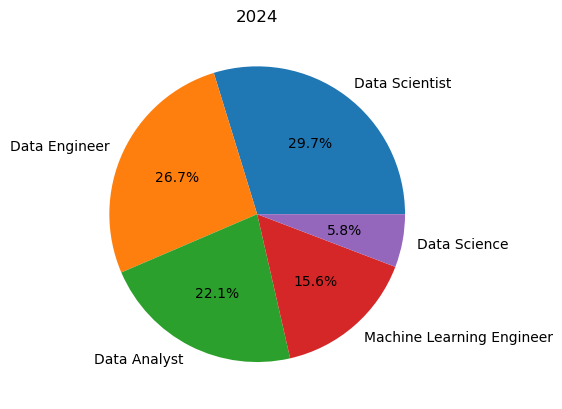

In [9]:
# Generate a pie plot showing the jobs in 2024
jobs_2024 = jobs_df.loc[jobs_df['work_year'] == 2024]
#jobs_2024["job_title"].value_counts().plot(kind = "pie", autopct='%1.1f%%',  ylabel = '', title = "2024")
jobs_2024["job_title"].value_counts().head(5).plot(kind = "pie", autopct='%1.1f%%', ylabel = '', title = "2024")
#plt.savefig("output_data/PieFig5.png")
plt.show()

In [10]:
# Define specific values to filter
specific_values = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']

# Create a boolean mask to filter column 'job_title' for specific values
mask = jobs_df['job_title'].isin(specific_values)

# Filter out the column 'job_title' with only specific values
top_4_jobs_df = jobs_df[mask]

#create a dataframe with the counts of each year
value_counts = top_4_jobs_df.groupby(['job_title', ('work_year')]).size().reset_index(name='count')

top_4_df = pd.DataFrame(value_counts)
top_4_df

,job_title,work_year,count
0,Data Analyst,2020,6
1,Data Analyst,2021,19
2,Data Analyst,2022,272
3,Data Analyst,2023,1262
4,Data Analyst,2024,561
5,Data Engineer,2020,11
6,Data Engineer,2021,35
7,Data Engineer,2022,487
8,Data Engineer,2023,1849
9,Data Engineer,2024,677


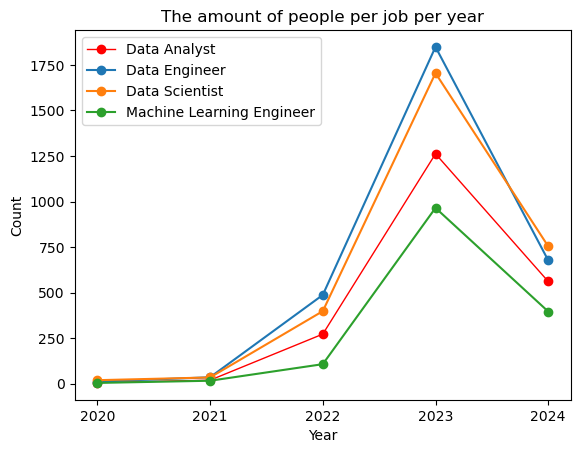

In [11]:
#filter the data to each job
data_analyst = top_4_df[top_4_df['job_title'].isin(['Data Analyst'])]
data_engineer = top_4_df[top_4_df['job_title'].isin(['Data Engineer'])]
data_scientist = top_4_df[top_4_df['job_title'].isin(['Data Scientist'])]
machine_learning_engineer = top_4_df[top_4_df['job_title'].isin(['Machine Learning Engineer'])]

# Create a line plot with the filtered data
Data_Analyst, = plt.plot(data_analyst['work_year'], data_analyst['count'], marker='o', linestyle='-', linewidth = 1,color = "red", label = "Data Analyst")
Data_Engineer, = plt.plot(data_engineer['work_year'], data_engineer['count'], marker='o', linestyle='-', label = "Data Engineer")
Data_Scientist, = plt.plot(data_scientist['work_year'], data_scientist['count'], marker='o', linestyle='-', label = "Data Scientist")
Machine_Learning_Engineer, = plt.plot(machine_learning_engineer['work_year'], machine_learning_engineer['count'], marker='o', linestyle='-', label = "Machine Learning Engineer")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('The amount of people per job per year')
#plt.xticks(rotation=45, fontsize=12, color='blue', ha='right')
#new_xticklabels = ['2020','2021', '2022', '2023', '2024']
plt.xticks([2020, 2021, 2022, 2023, 2024 ],['2020','2021', '2022', '2023', '2024'])
#xticks([0, 1, 2], ['January', 'February', 'March'],
       #rotation=20)
#plt.xticks(np.arange(5), ['2020','2021', '2022', '2023', '2024'],rotation=45, fontsize=12, color='blue', ha='right')
plt.legend(handles=[Data_Analyst,Data_Engineer, Data_Scientist, Machine_Learning_Engineer], loc="best")

#plt.savefig("output_data/CompletePlotFig6.png")
# Show the plot
plt.show()

# Exploring Salaries by Location

In [12]:
#Calculate the mean salary worldwide
mean_salary_usd = jobs_df['salary_in_usd'].mean()
median_salary = jobs_df['salary_in_usd'].median()
min_salary= jobs_df['salary_in_usd'].min()
max_salary= jobs_df['salary_in_usd'].max()

print("the Average salary is" , mean_salary_usd)
print("the median salary is", median_salary)
print("the lowest pay is ", min_salary)
print("the highest pay is ", max_salary)


the Average salary is 149472.04944010143
the median salary is 142000.0
the lowest pay is  15000
the highest pay is  450000


In [13]:
#Work setting counts
work_setting_counts = jobs_df['work_setting'].value_counts()

work_setting_counts

work_setting
In-person    9413
Remote       4573
Hybrid        213
Name: count, dtype: int64

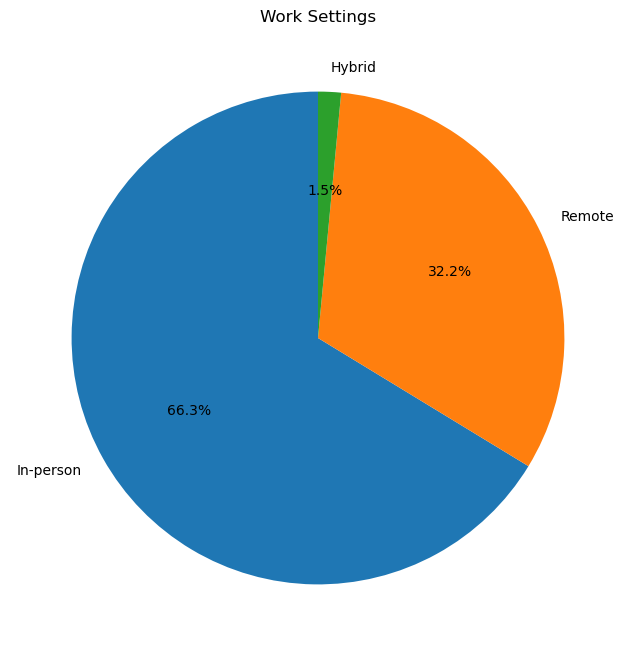

In [14]:
#Work setting plot
plt.figure(figsize=(8, 8))
plt.pie(work_setting_counts, labels=work_setting_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Work Settings')

plt.show()

In [15]:
#Generate job counts for the top five countries surveyed
company_location_counts = jobs_df['company_location'].value_counts()
company_location_counts.head()


company_location
United States     12465
United Kingdom      623
Canada              373
Spain               127
Germany              96
Name: count, dtype: int64

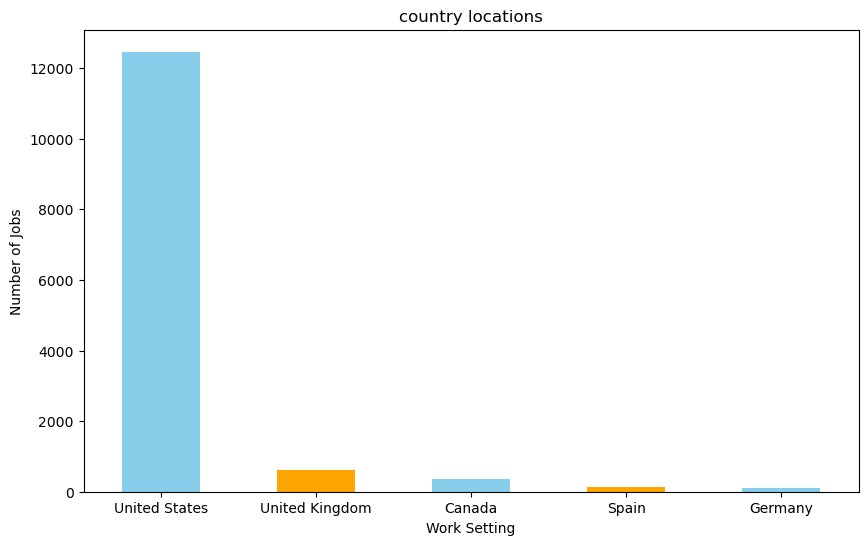

In [16]:
# Plotting the bar graph of job count by country
company_location_counts = jobs_df['company_location'].value_counts().nlargest(5)


plt.figure(figsize=(10, 6))
company_location_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('country locations')
plt.xlabel('Work Setting')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.show()

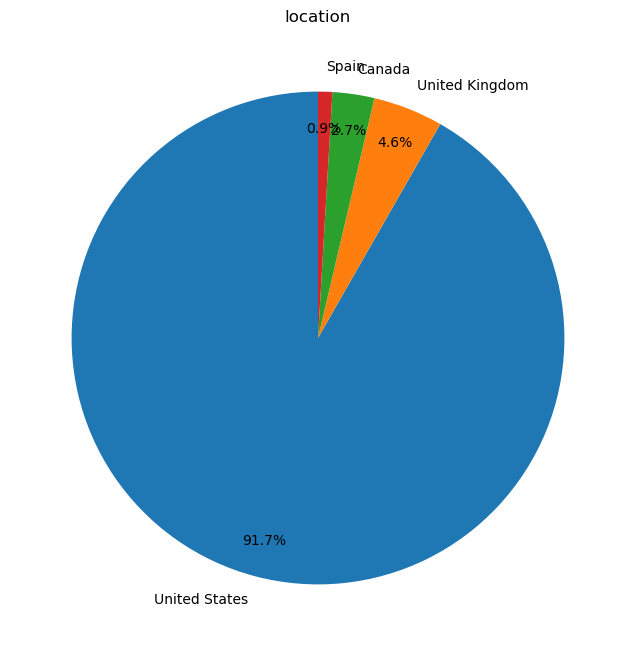

In [17]:
#Generate Plot showing the top 4 countries by percent of jobs
company_location_counts = jobs_df['company_location'].value_counts().nlargest(4)

# Plotting the pie chart with spaced labels
plt.figure(figsize=(8, 8))
plt.pie(company_location_counts, labels=company_location_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('location')
plt.show()

In [18]:
#Looking at employee residence
df_counts = jobs_df['employee_residence'].value_counts().reset_index()

df_counts.head()

,employee_residence,count
0,United States,12418
1,United Kingdom,616
2,Canada,371
3,Spain,131
4,Germany,90


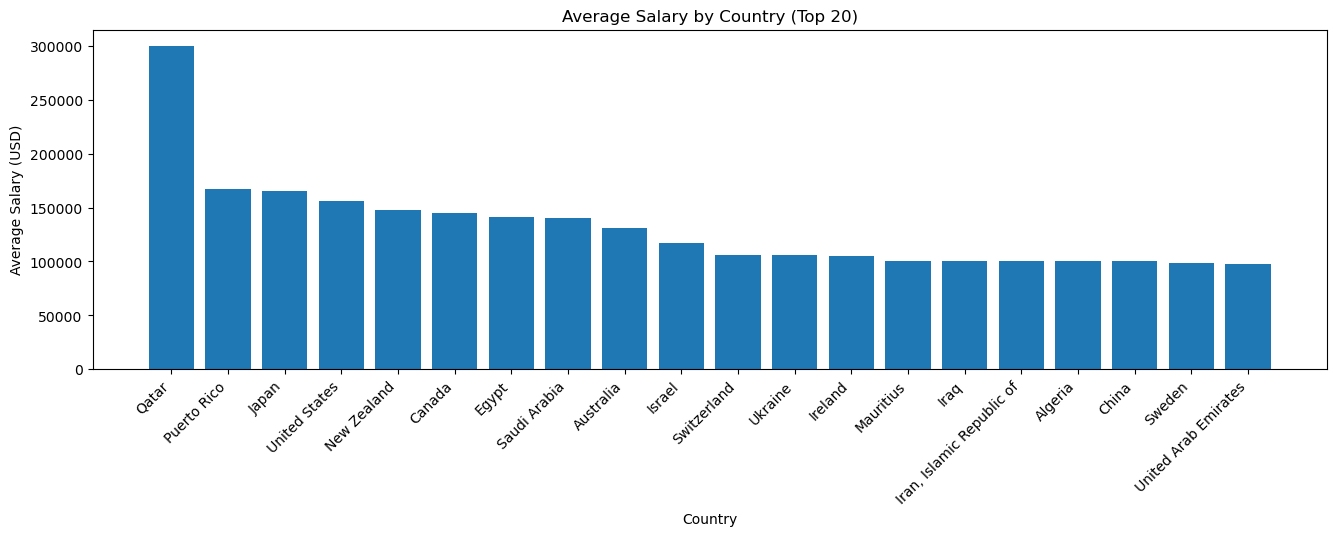

In [19]:
#Find the average salary for the top 20 countries
avg_salary_by_location = jobs_df.groupby('company_location')['salary_in_usd'].mean().reset_index()
top_15_countries = avg_salary_by_location.sort_values('salary_in_usd', ascending=False).head(20)

plt.figure(figsize=(14, 6))
plt.bar(top_15_countries['company_location'], top_15_countries['salary_in_usd'])
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)
plt.show()

# Exploring Salaries by Experience

In [20]:
experience_level_counts = jobs_df['experience_level'].value_counts()

experience_level_counts

experience_level
Senior         9381
Mid-level      3339
Entry-level    1063
Executive       416
Name: count, dtype: int64

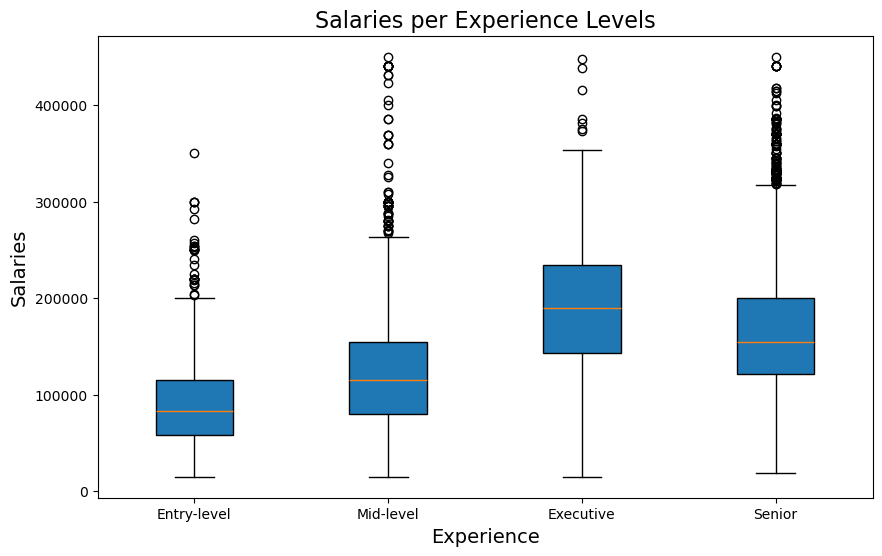

In [21]:
#Generate a Box Plot summarizing salaries by expierence 
levels = ["Entry-level", "Mid-level", "Executive", "Senior"]

total_exp_vol = []

for level in levels:
    exp_vol = jobs_df.loc[jobs_df['experience_level'] == level, 'salary_in_usd']
    total_exp_vol.append(exp_vol)

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Salaries per Experience Levels',fontsize =16)
ax1.set_ylabel('Salaries',fontsize = 14)
ax1.set_xlabel('Experience',fontsize = 14)
ax1.boxplot(total_exp_vol, labels=levels, widths = 0.4, patch_artist=True,vert=True)

#plt.savefig("output_data/boxplot.png")

plt.show()

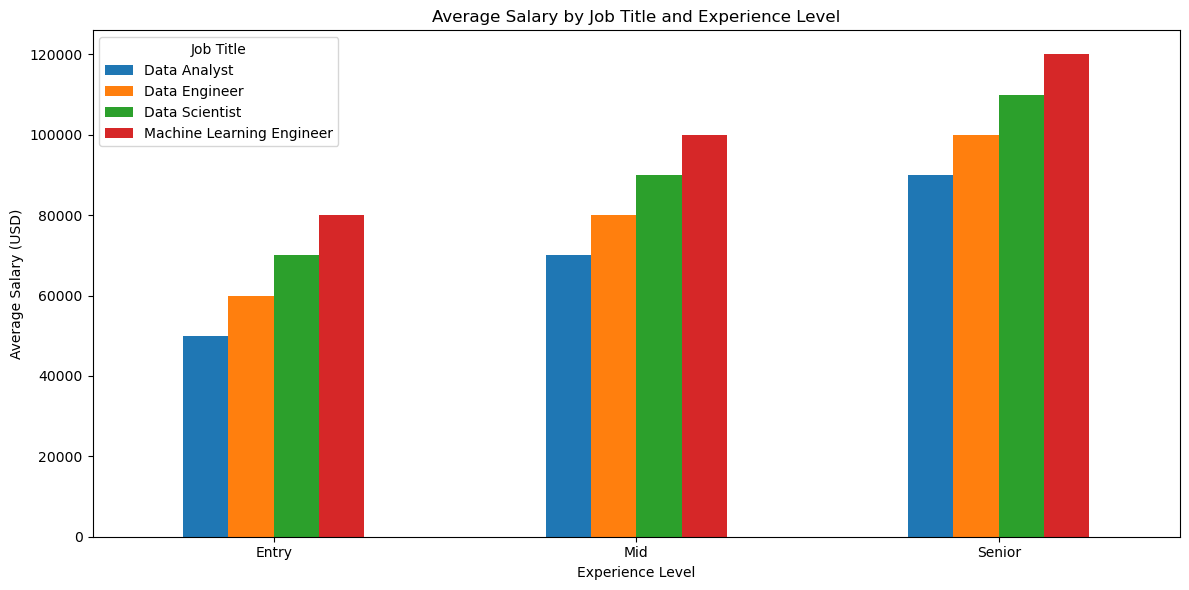

In [22]:
#Generate a Summary Graph for the top 4 most popular job titles
data = {
    'experience_level': ['Entry', 'Mid', 'Senior', 'Entry', 'Mid', 'Senior', 'Entry', 'Mid', 'Senior', 'Entry', 'Mid', 'Senior'],
    'job_title': ['Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer'],
    'salary_in_usd': [50000, 70000, 90000, 60000, 80000, 100000, 70000, 90000, 110000, 80000, 100000, 120000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate average salary for each job title and experience level
avg_salary = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Pivot the DataFrame to have job titles as columns
avg_salary_pivot = avg_salary.pivot(index='experience_level', columns='job_title', values='salary_in_usd')

# Plot the graph
avg_salary_pivot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title and Experience Level')
plt.xticks(rotation=0)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

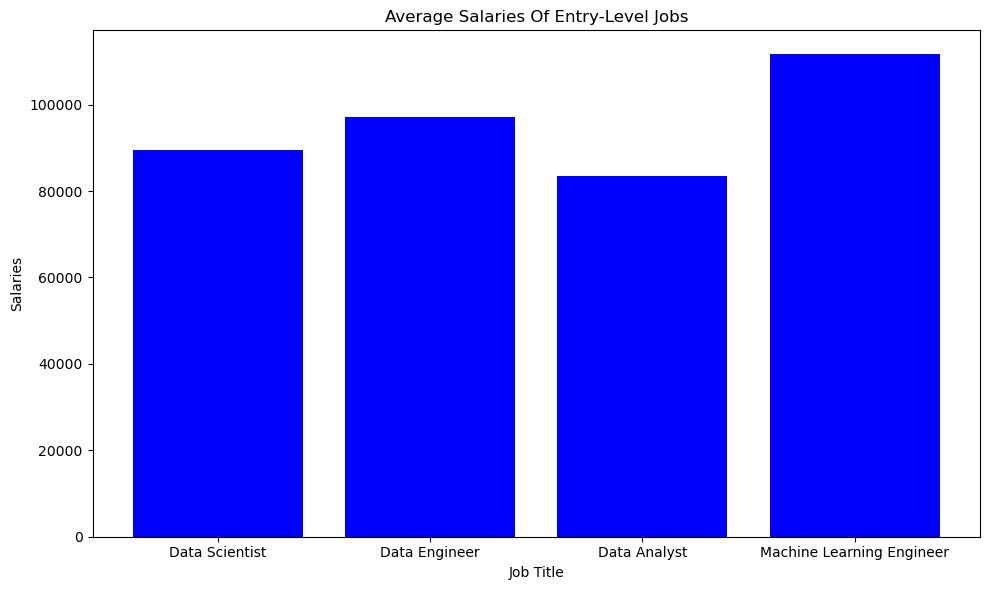

In [5]:
entry_level = jobs_df.loc[jobs_df['experience_level'] == "Entry-level", :]

data_scientist = entry_level.loc[entry_level['job_title'] == "Data Scientist", :]
scientist_mean = data_scientist['salary_in_usd'].mean()

data_engineer = entry_level.loc[entry_level['job_title'] == "Data Engineer", :]
engineer_mean = data_engineer['salary_in_usd'].mean()

data_analyst = entry_level.loc[entry_level['job_title'] == "Data Analyst", :]
analyst_mean = data_analyst['salary_in_usd'].mean()

machine_learning = entry_level.loc[entry_level['job_title'] == "Machine Learning Engineer", :]
machine_mean = machine_learning['salary_in_usd'].mean()

levels = ["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer"]
levels_mean = [scientist_mean, engineer_mean, analyst_mean, machine_mean]

plt.figure(figsize=(10, 6))
plt.bar(levels, levels_mean, color="b", align="center")

plt.xlabel("Job Title")
plt.ylabel("Salaries")
plt.title("Average Salaries Of Entry-Level Jobs")
plt.tight_layout()

#plt.savefig("output_data/entrybar.png")

plt.show()

In [6]:
entry_level = jobs_df.loc[jobs_df['experience_level'] == "Entry-level", :]
mid_level = jobs_df.loc[jobs_df['experience_level'] == "Mid-level", :]
senior_level = jobs_df.loc[jobs_df['experience_level'] == "Senior", :]
executive_level = jobs_df.loc[jobs_df['experience_level'] == "Executive", :]

max_entry = entry_level.max()
max_mid = mid_level.max()
max_senior = senior_level.max()
max_executive = executive_level.max()

min_entry = entry_level.min()
min_mid = mid_level.min()
min_senior = senior_level.min()
min_executive = executive_level.min()

max_entry

work_year                                2024
experience_level                  Entry-level
employment_type                     Part-time
job_title                  Staff Data Analyst
salary                                 350000
salary_currency                           USD
salary_in_usd                          350000
employee_residence                 Uzbekistan
work_setting                           Remote
company_location                United States
company_size                                S
job_category          Machine Learning and AI
dtype: object

In [7]:
min_entry

work_year                             2020
experience_level               Entry-level
employment_type                   Contract
job_title                     AI Developer
salary                               14000
salary_currency                        AUD
salary_in_usd                        15000
employee_residence                 Algeria
work_setting                        Hybrid
company_location                   Algeria
company_size                             L
job_category          BI and Visualization
dtype: object

In [8]:
max_mid

work_year                                2024
experience_level                    Mid-level
employment_type                     Part-time
job_title                  Staff Data Analyst
salary                                 450000
salary_currency                           USD
salary_in_usd                          450000
employee_residence                   Viet Nam
work_setting                           Remote
company_location                     Viet Nam
company_size                                S
job_category          Machine Learning and AI
dtype: object

In [9]:
min_mid

work_year                             2020
experience_level                 Mid-level
employment_type                   Contract
job_title                     AI Developer
salary                               15000
salary_currency                        AUD
salary_in_usd                        15000
employee_residence          American Samoa
work_setting                        Hybrid
company_location                   Andorra
company_size                             L
job_category          BI and Visualization
dtype: object

In [10]:
max_senior

work_year                                        2024
experience_level                               Senior
employment_type                             Full-time
job_title             Staff Machine Learning Engineer
salary                                         450000
salary_currency                                   USD
salary_in_usd                                  450000
employee_residence                           Viet Nam
work_setting                                   Remote
company_location                        United States
company_size                                        S
job_category                  Machine Learning and AI
dtype: object

In [11]:
min_senior

work_year                             2020
experience_level                    Senior
employment_type                   Contract
job_title                     AI Architect
salary                               21600
salary_currency                        AUD
salary_in_usd                        18381
employee_residence               Argentina
work_setting                        Hybrid
company_location                 Argentina
company_size                             L
job_category          BI and Visualization
dtype: object

In [12]:
max_executive

work_year                                2024
experience_level                    Executive
employment_type                     Full-time
job_title                  Staff Data Analyst
salary                                 448000
salary_currency                           USD
salary_in_usd                          448000
employee_residence                 Uzbekistan
work_setting                           Remote
company_location                United States
company_size                                S
job_category          Machine Learning and AI
dtype: object

In [13]:
min_executive

work_year                             2020
experience_level                 Executive
employment_type                   Contract
job_title                     AI Architect
salary                               15000
salary_currency                        CAD
salary_in_usd                        15000
employee_residence                 Belgium
work_setting                        Hybrid
company_location                    Brazil
company_size                             L
job_category          BI and Visualization
dtype: object

In [15]:
entry_level = jobs_df.loc[jobs_df['experience_level'] == "Entry-level", :]
us_job = entry_level.loc[entry_level['company_location'] == "United States", :]
machine = us_job.loc[us_job['job_title'] == "Machine Learning Engineer", :]
highest_average = machine['salary_in_usd'].mean()
highest_average

126188.85294117648

In [16]:
remote = jobs_df.loc[jobs_df['work_setting'] == "Remote", :]
max_remote = remote.max()
max_remote

work_year                                2024
experience_level                       Senior
employment_type                     Part-time
job_title                Staff Data Scientist
salary                                 448000
salary_currency                           USD
salary_in_usd                          448000
employee_residence                   Viet Nam
work_setting                           Remote
company_location                     Viet Nam
company_size                                S
job_category          Machine Learning and AI
dtype: object

In [17]:
scientist_remote = remote.loc[remote['job_title'] == "Staff Data Scientist", :]
average_remote = scientist_remote['salary_in_usd'].mean()
average_remote

105000.0